# 📘 Day 6 – Conditional Probability & Bayes
## Objective: Build Intuition for Bayesian Thinking
---
**Concept Recap:**
- Conditional Probability: P(A|B) = P(A ∩ B) / P(B)
- Bayes’ Theorem: P(A|B) = [P(B|A) * P(A)] / P(B)
- Naive Bayes assumes features are conditionally independent given the class.

### 🧠 Dataset: SMS Spam Collection
We’ll classify messages as **spam** or **ham (not spam)** using Naive Bayes.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
df = pd.read_csv(url, sep='	', header=None, names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 🧹 Preprocessing & Splitting

In [2]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### ⚙️ Train Naive Bayes Model

In [3]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred = nb.predict(X_test_vec)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9883408071748879


### 📊 Evaluate Performance

In [4]:
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['Actual Ham', 'Actual Spam'],
             columns=['Pred Ham', 'Pred Spam'])

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



,Pred Ham,Pred Spam
Actual Ham,961,5
Actual Spam,8,141


### 🔍 Visualizing Probabilities

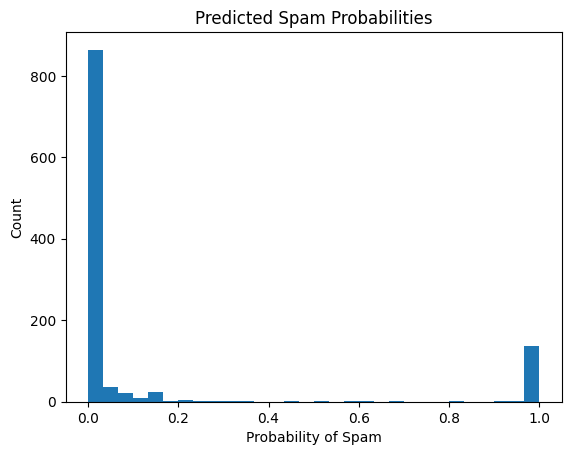

In [5]:
import matplotlib.pyplot as plt

spam_prob = nb.predict_proba(X_test_vec)[:, 1]
plt.hist(spam_prob, bins=30)
plt.title('Predicted Spam Probabilities')
plt.xlabel('Probability of Spam')
plt.ylabel('Count')
plt.show()

### 🧩 Insight
- **Conditional probability** drives classification.
- Each word contributes to the probability of being spam or ham.
- Simple yet powerful — this is the backbone of many text classifiers.

### ✅ Save Results

In [ ]:
df_results = pd.DataFrame({'message': X_test, 'actual': y_test, 'predicted': y_pred})
df_results.head()